In [1]:
from numpy import unique
from numpy import where
import numpy
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

In [68]:
from utils import load_embeddings, load_projects
dataset = load_embeddings('../data/components_embeddings/proj_infomap-fastText-multi-stop.vec', skip=1)

In [69]:
projects, mapping = load_projects('.', 'java-projects - java-projects (1).csv')
labels = {k:v for k,v in zip(projects['names'], projects['labels_id'])}

In [70]:
X = []
y = []
names = []
for x in dataset:
    X.append(dataset[x])
    y.append(labels[x])
    names.append(x)
X = numpy.array(X)

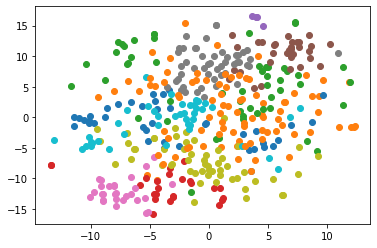

In [72]:
pca = TSNE(n_components=2)
X_lower = pca.fit_transform(X)
model = KMeans(n_clusters=13)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
pca = TSNE(n_components=2)
X_lower = pca.fit_transform(X)
cluster_members = {}
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    cluster_members[cluster] = [names[i] for i in row_ix[0]]
    # create scatter of these samples
    pyplot.scatter(X_lower[row_ix, 0], X_lower[row_ix, 1])
# show the plot
pyplot.show()

In [51]:
#sum(pca.explained_variance_ratio_)

In [52]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y, yhat)


0.09115084662485454

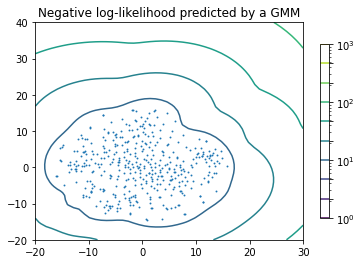

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

clf = mixture.GaussianMixture(n_components=13)
clf.fit(X_lower)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_lower[:, 0], X_lower[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
#plt.axis('tight')
plt.show()

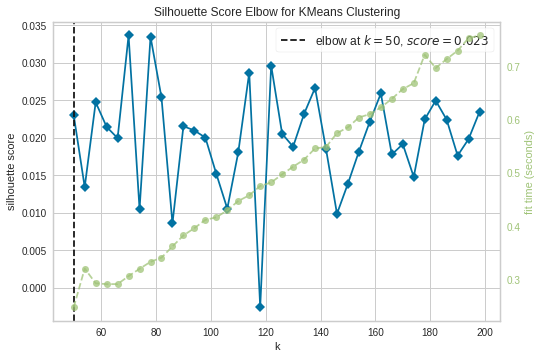

In [73]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=range(50, 200, 4), metric='silhouette')

model = KMedoids(metric='cosine')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()